# Make Effective Data Visualization

This notebook investigate the original RITA Airline On-Time Statistics and Delay Causes from [2008 dataset](http://stat-computing.org/dataexpo/2009/the-data.html) and generate the final dataset for visualization.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
flights_df = pd.read_csv('2008.csv')

In [6]:
# Variables
flights_df.columns.values

array(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], dtype=object)

I will explore the delays by month, therefore I subset the dataset with the following variables:
- Month: 1-12
- ArrDelay: Arrival delay, in minutes
- DepDelay: Departure delay, in minutes
- Cancelled: Was the flight cancelled?

In [42]:
flights_delays_df = flights_df[['Month', 'ArrDelay', 'DepDelay', 'Cancelled']]

According to [RITA website](https://www.rita.dot.gov/bts/help_with_data/aviation/index.html#q8), a flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS). Arrival performance is based on arrival at the gate. Departure performance is based on departure from the gate.

I will add a new column 'ArrDelayed' to track whether a flight counts as arrival delayed. A flight is counted as arrival delayed if arrival delay minutes is greater or equal to 15 minutes.

Similarly, I will add another column 'DepDelayed' to track whether a flight counts as departure delayed. A flight is counted as departure delayed if departure delay minutes is greater or equal to 15 minutes.

In [44]:
# Add ArrDelayed column which contains True for arrival delayed fights, 
# False for non-delayed flights
flights_delays_df.loc[:,'ArrDelayed'] = flights_delays_df['ArrDelay'] > 15

# Add ArrDelayed column which contains True for departure delayed fights, 
# False for non-delayed flights
flights_delays_df.loc[:,'DepDelayed'] = flights_delays_df['DepDelay'] > 15

/Users/zhenmao/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [46]:
flights_delays_df.head()

,Month,ArrDelay,DepDelay,Cancelled,ArrDelayed,DepDelayed
0,1,-14.0,8.0,0,False,False
1,1,2.0,19.0,0,False,True
2,1,14.0,8.0,0,False,False
3,1,-6.0,-4.0,0,False,False
4,1,34.0,34.0,0,True,True


In [47]:
# Calculate monthly cancelled, arrival delayed, and departure delayed rates
flights_delays_months_df = flights_delays_df.groupby('Month').mean()

In [48]:
flights_delays_months_df

,ArrDelay,DepDelay,Cancelled,ArrDelayed,DepDelayed
Month,,,,,
1,10.188856,11.476096,0.028572,0.236354,0.203318
2,13.077837,13.706226,0.036182,0.264713,0.227872
3,11.192365,12.491269,0.026267,0.245915,0.216730
4,6.807297,8.201133,0.017312,0.195633,0.165163
5,5.978448,7.642741,0.010274,0.189488,0.158588
6,13.266756,13.609818,0.017959,0.260693,0.224876
7,9.975050,11.807545,0.016878,0.215240,0.196690
8,6.910915,9.614753,0.016063,0.189374,0.173151
9,0.697733,3.961819,0.018327,0.125406,0.108270


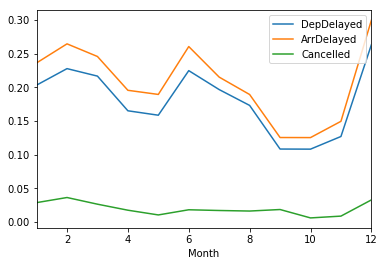

In [50]:
flights_delays_months_df[['DepDelayed', 'ArrDelayed', 'Cancelled']].plot()

In [52]:
# Save the final dataset to csv
flights_delays_months_df.to_csv('2008_rates_by_month.csv', 
                                columns = ['DepDelayed', 'ArrDelayed', 'Cancelled'])